In [1]:
import pandas as pd
pd.set_option('display.max_columns', 40)
#pd.set_option('display.max_rows', 5)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as scs
from sklearn.model_selection import train_test_split
import string
from scipy import stats

In [2]:
# Read Data
data = pd.read_excel('HR-Employee-Attrition.xlsx')
# data

## Missing Value Analysis

In [3]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Hence there are NO missing values.

In [4]:
data.shape

(1470, 35)

In [5]:
columns = list(data.columns)
# columns

In [6]:
# Display unique values of each column.
for col in columns:
    print('////// ',col, ' -> UNIQUE_COUNT(', data[col].nunique(), ') //////')
    print(data[col].unique())
    print('---------------------------------------------------------------------------')
    print('---------------------------------------------------------------------------')

//////  Age  -> UNIQUE_COUNT( 43 ) //////
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
---------------------------------------------------------------------------
---------------------------------------------------------------------------
//////  Attrition  -> UNIQUE_COUNT( 2 ) //////
['Yes' 'No']
---------------------------------------------------------------------------
---------------------------------------------------------------------------
//////  BusinessTravel  -> UNIQUE_COUNT( 3 ) //////
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
---------------------------------------------------------------------------
---------------------------------------------------------------------------
//////  DailyRate  -> UNIQUE_COUNT( 886 ) //////
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 

Since columns 'EmployeeCount', 'Over18', 'StandardHours' contain only 1 unique value, they do not contribute anything to the model development. Hence we remove those columns. <br>

'EmployeeNumber' also doesn't contribute anything, but we keep it since we have to map the output with the Employee.

In [7]:
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
# data

In [8]:
# Education_map = {1:'Below College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'}
# EnvironmentSatisfaction_map = {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}
# JobInvolvement_map = {1:'Low',2:'Medium',3:'High',4:'Very High'}
# JobSatisfaction_map = {1:'Low',2:'Medium',3:'High',4:'Very High'}
# PerformanceRating_map = {1:'Low',2:'Good',3:'Excellent',4:'Outstanding'}
# RelationshipSatisfaction_map = {1:'Low',2:'Medium',3:'High',4:'Very High'}
# WorkLifeBalance_map = {1:'Bad',2:'Good',3:'Better',4:'Best'}

# # Inverse map
# Education_map = {value:key for key,value in Education_map.items()}
# EnvironmentSatisfaction_map = {value:key for key,value in EnvironmentSatisfaction_map.items()}
# JobInvolvement_map = {value:key for key,value in JobInvolvement_map.items()}
# JobSatisfaction_map = {value:key for key,value in JobSatisfaction_map.items()}
# PerformanceRating_map = {value:key for key,value in PerformanceRating_map.items()}
# WorkLifeBalance_map = {value:key for key,value in WorkLifeBalance_map.items()}
# RelationshipSatisfaction_map = {value:key for key,value in RelationshipSatisfaction_map.items()}
# RelationshipSatisfaction_map = {value:key for key,value in RelationshipSatisfaction_map.items()}

In [9]:
# Mapping categorical variables to numeric values
Attrition_map = {'No':0, 'Yes':1}
BusinessTravel_map = {'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2}
Department_map = {'Sales':0, 'Research & Development':1, 'Human Resources':2}
EducationField_map = {'Life Sciences':0, 'Medical':1, 'Marketing':2, 'Technical Degree':3, 'Human Resources':4, 'Other':5}
Gender_map = {'Female':0, 'Male':1}
JobRole_map = {'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2,
 'Manufacturing Director':3, 'Healthcare Representative':4, 'Manager':5,
 'Sales Representative':6, 'Research Director':7, 'Human Resources':8}
MaritalStatus_map = {'Single':1, 'Married':0, 'Divorced':2}
OverTime_map = {'Yes':1, 'No':0}
# Over18_map = {'Y':1, 'N':0}

## JobLevel : We do not have enough data to map the numbers.
## StockOptionLevel : We do not have enough data to map the numbers.

data['Attrition'] = data['Attrition'].map(Attrition_map)
data['BusinessTravel'] = data['BusinessTravel'].map(BusinessTravel_map)
data['Department'] = data['Department'].map(Department_map)
data['EducationField'] = data['EducationField'].map(EducationField_map)
data['Gender'] = data['Gender'].map(Gender_map)
data['JobRole'] = data['JobRole'].map(JobRole_map)
data['MaritalStatus'] = data['MaritalStatus'].map(MaritalStatus_map)
# data['Over18'] = data['Over18'].map(Over18_map)
data['OverTime'] = data['OverTime'].map(OverTime_map)

In [10]:
#Converting repective variables to required data format 

# Setting to numerical data type
data['Age'] = data['Age'].astype('int')
data['DistanceFromHome'] = data['DistanceFromHome'].astype('int')
data['EmployeeNumber'] = data['EmployeeNumber'].astype('int')
# data['EmployeeCount'] = data['EmployeeCount'].astype('int')
data['DailyRate'] = data['DailyRate'].astype('int')
data['HourlyRate'] = data['HourlyRate'].astype('int')
data['MonthlyRate'] = data['MonthlyRate'].astype('int')
data['MonthlyIncome'] = data['MonthlyIncome'].astype('int')
data['TotalWorkingYears'] = data['TotalWorkingYears'].astype('int')
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].astype('int')
data['TrainingTimesLastYear'] = data['TrainingTimesLastYear'].astype('int')
data['YearsAtCompany'] = data['YearsAtCompany'].astype('int')
data['YearsInCurrentRole'] = data['YearsInCurrentRole'].astype('int')
data['YearsSinceLastPromotion'] = data['YearsSinceLastPromotion'].astype('int')
data['YearsWithCurrManager'] = data['YearsWithCurrManager'].astype('int')
data['PercentSalaryHike'] = data['PercentSalaryHike'].astype('int')
# data['StandardHours'] = data['StandardHours'].astype('int')

# Setting to Categorical data type
data['Attrition'] = data['Attrition'].astype('category')
data['BusinessTravel'] = data['BusinessTravel'].astype('category')
data['Department'] = data['Department'].astype('category')
data['EducationField'] = data['EducationField'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['JobRole'] = data['JobRole'].astype('category')
data['MaritalStatus'] = data['MaritalStatus'].astype('category')
# data['Over18'] = data['Over18'].astype('category')
data['OverTime'] = data['OverTime'].astype('category')
data['Education'] = data['Education'].astype('category')
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].astype('category')
data['JobInvolvement'] = data['JobInvolvement'].astype('category')
data['JobSatisfaction'] = data['JobSatisfaction'].astype('category')
data['PerformanceRating'] = data['PerformanceRating'].astype('category')
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].astype('category')
data['WorkLifeBalance'] = data['WorkLifeBalance'].astype('category')
data['JobLevel'] = data['JobLevel'].astype('category')
data['StockOptionLevel'] = data['StockOptionLevel'].astype('category')

In [11]:
columns = data.columns

In [12]:
numerical_columns = list(data._get_numeric_data().columns)
# numerical_columns

In [13]:
categorical_columns = list(set(columns) - set(numerical_columns))
# categorical_columns

## Outlier Analysis

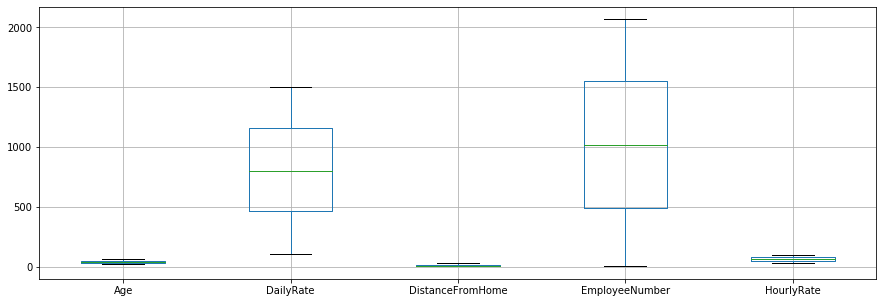

In [14]:
data[numerical_columns[0:5]].boxplot(figsize=(15, 5))

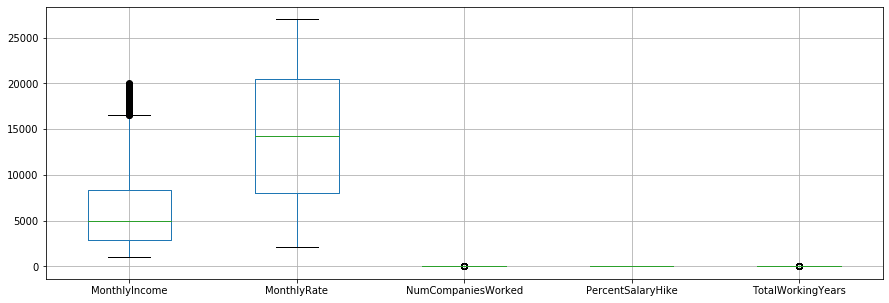

In [15]:
data[numerical_columns[5:10]].boxplot(figsize=(15, 5))

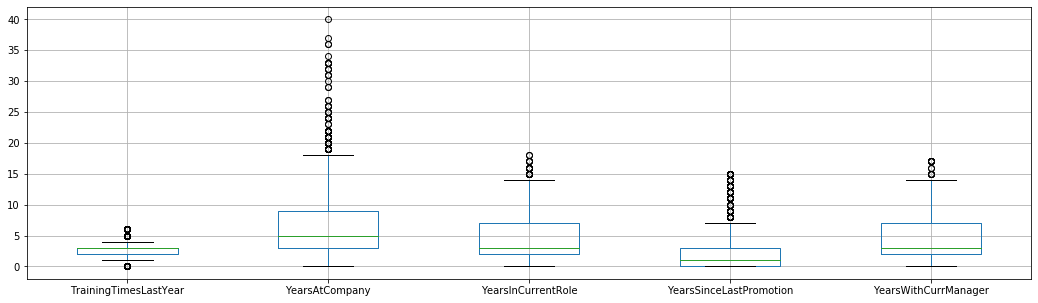

In [16]:
data[numerical_columns[10:]].boxplot(figsize=(18, 5))

There Outliers are present in:
'MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'

### Removing Outliers using BoxPlot Method.

In [17]:
def removeOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 # Inter Quartile Range
    
    filter = (df[column] >= (Q1 - 1.5 * IQR)) & ((df[column] <= (Q3 + 1.5 * IQR)))
    noOfOutliers = df.shape[0] - df.loc[filter].shape[0]
    return noOfOutliers, df.loc[filter]

In [18]:
data1 = data.copy()
for col in numerical_columns:
    NoOfOutliers, data1 = removeOutliers(data1, col)
    print('Column: ', col.upper(), ' --> Number of Outliers:', NoOfOutliers)
    print('-----------------------------------------------------------------')
print('Final Data Shape: ', data1.shape)
data1.reset_index(inplace=True, drop=True)

Column:  AGE  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  DAILYRATE  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  DISTANCEFROMHOME  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  EMPLOYEENUMBER  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  HOURLYRATE  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  MONTHLYINCOME  --> Number of Outliers: 114
-----------------------------------------------------------------
Column:  MONTHLYRATE  --> Number of Outliers: 0
-----------------------------------------------------------------
Column:  NUMCOMPANIESWORKED  --> Number of Outliers: 47
-----------------------------------------------------------------
Column:  PERCENTSALARYHIKE  --> Number of Outliers: 0
-------------------------

Therefore, when we use boxplot method to remove outliers, we are loosing (1470-889 = ) 581 rows.

### Removing Outliers using Z-Scores

In [19]:
z_scores = stats.zscore(data[numerical_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data2 = data[filtered_entries]
data2.reset_index(drop=True, inplace=True)
data2.shape

(1387, 32)

Therefore, when we use z-score method to remove outliers, we are loosing (1470-1387 = ) 83 rows. 

##### After executing the script with both data1 and data2, removing outliers by box plot is resulting in the improved performance of the model, therefore we select 'data1'

In [20]:
data = data1.copy()

## Feature Selection

### Feature Selection for numerical variables using correlation analysis.

In [21]:
correlation_matrix = pd.DataFrame(data[numerical_columns].corr())
# correlation_matrix

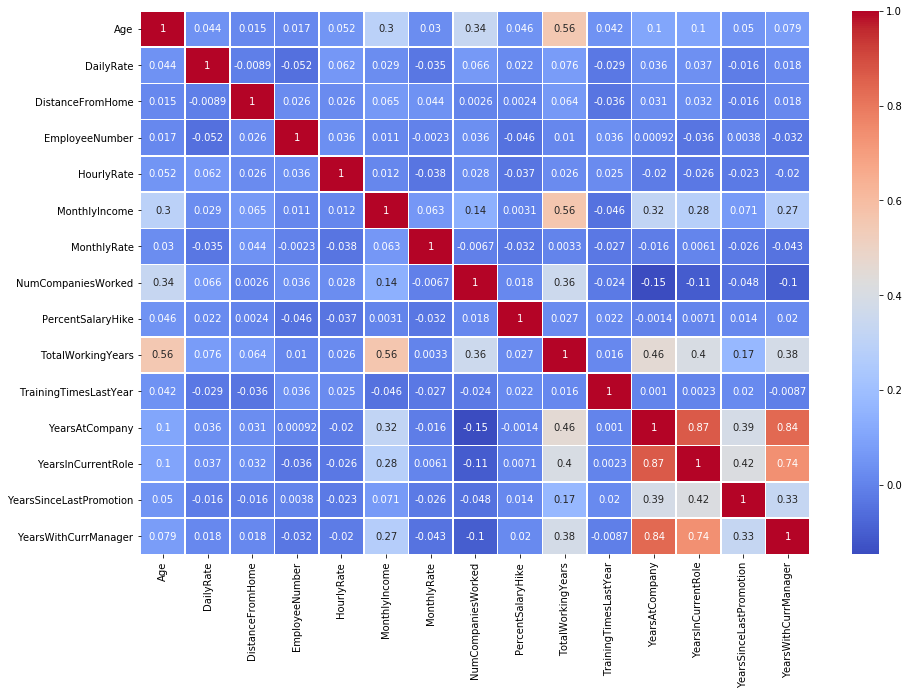

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, linecolor='w', annot=True)
plt.show()

In [23]:
# Display pair of columns having correlation greater than 0.70

row = list(correlation_matrix.index)
col = list(correlation_matrix.columns)
corr_mark = 0.70
atleastOne = 0
l = []
for r in row:
    for c in col:
        if r != c:
            if [c, r] not in l:
                if correlation_matrix[r][c] > corr_mark:
                    atleastOne = 1
                    l.append([r, c])
                    print(r, ' - ', c, '  --> ', correlation_matrix[r][c])
                else:
                    continue
            else:
                continue
        else:
            continue
if atleastOne == 0:
    print('NONE of the columns have Correlation greater than', corr_mark)

YearsAtCompany  -  YearsInCurrentRole   -->  0.8662712846232123
YearsAtCompany  -  YearsWithCurrManager   -->  0.8360739278361795
YearsInCurrentRole  -  YearsWithCurrManager   -->  0.7361331261925638


Columns that are highly correlated are,<br>
    'YearsInCurrentRole' and 'YearsAtCompany'<br>
    'YearsAtCompany' and 'YearsWithCurrManager'<br>
    'YearsWithCurrManager' and 'YearsInCurrentRole'<br>

In [24]:
# Removing columns 'YearsWithCurrManager' and 'YearsAtCompany' because of correlation.
data = data.drop(['YearsWithCurrManager', 'YearsAtCompany'], axis=1)

### Feature Selection for Categorical Variables using Chi-Square test

In [25]:
def crossTab(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2], margins=True)
    return contingency_table

def Chi_Square_Test(df, cols):
    col_pairs = list(itertools.combinations(cols, 2))
    for col1,col2 in col_pairs:
        probability = 0.95
        alpha = 1.0 - probability
        Chi_Sq_Statistic, P_val, Dof, Expected_freq = scs.chi2_contingency(crossTab(df, col1, col2))
        Critical_val = scs.chi2.ppf(probability, Dof)
        
#         print('For columns', col1.upper(), 'and', col2.upper(), ':')
#         print('Probability/Confidence_Level', probability)
#         print('Alpha/Significance_Level', alpha)
#         print('Chi-Square Statistic', Chi_Sq_Statistic)
#         print('P-value', P_val)
#         print('Degree of Freedom', Dof)
#         print('Expected Frequency', Expected_freq)
#         print('Critical Value', Critical_val)
#         print('THEREFORE............')
        
        if (abs(Chi_Sq_Statistic) >= Critical_val) & (P_val <= alpha):
            print('Reject H0. -> ',col1,'and',col2,'are Dependent. \n')
        else:
            print('Fail to reject H0. -> ',col1,'and',col2,'are Independent. \n')

In [26]:
Chi_Square_Test(data, list(set(categorical_columns)-set(['Attrition'])))

Fail to reject H0. ->  EnvironmentSatisfaction and StockOptionLevel are Independent. 

Fail to reject H0. ->  EnvironmentSatisfaction and JobRole are Independent. 

Fail to reject H0. ->  EnvironmentSatisfaction and PerformanceRating are Independent. 

Fail to reject H0. ->  EnvironmentSatisfaction and BusinessTravel are Independent. 

Fail to reject H0. ->  EnvironmentSatisfaction and Department are Independent. 

Fail to reject H0. ->  EnvironmentSatisfaction and JobSatisfaction are Independent. 

Fail to reject H0. ->  EnvironmentSatisfaction and MaritalStatus are Independent. 

Fail to reject H0. ->  EnvironmentSatisfaction and OverTime are Independent. 

Fail to reject H0. ->  EnvironmentSatisfaction and Gender are Independent. 

Fail to reject H0. ->  EnvironmentSatisfaction and JobInvolvement are Independent. 

Fail to reject H0. ->  EnvironmentSatisfaction and WorkLifeBalance are Independent. 

Fail to reject H0. ->  EnvironmentSatisfaction and RelationshipSatisfaction are Inde

Fail to reject H0. ->  WorkLifeBalance and EducationField are Independent. 

Fail to reject H0. ->  WorkLifeBalance and JobLevel are Independent. 

Fail to reject H0. ->  RelationshipSatisfaction and Education are Independent. 

Fail to reject H0. ->  RelationshipSatisfaction and EducationField are Independent. 

Fail to reject H0. ->  RelationshipSatisfaction and JobLevel are Independent. 

Fail to reject H0. ->  Education and EducationField are Independent. 

Reject H0. ->  Education and JobLevel are Dependent. 

Reject H0. ->  EducationField and JobLevel are Dependent. 



'Department', 'JobRole', 'JobLevel', 'EducationField', 'Education', 'StockOptionLevel', 'MaritalStatus' are Dependent of each other. <br>

In [27]:
# Removing columns 'Department', 'JobRole', 'EducationField', 'StockOptionField' as a result of Chi-Square test.
data = data.drop(['Department', 'JobRole', 'EducationField', 'StockOptionLevel'], axis=1)

## Feature Scaling

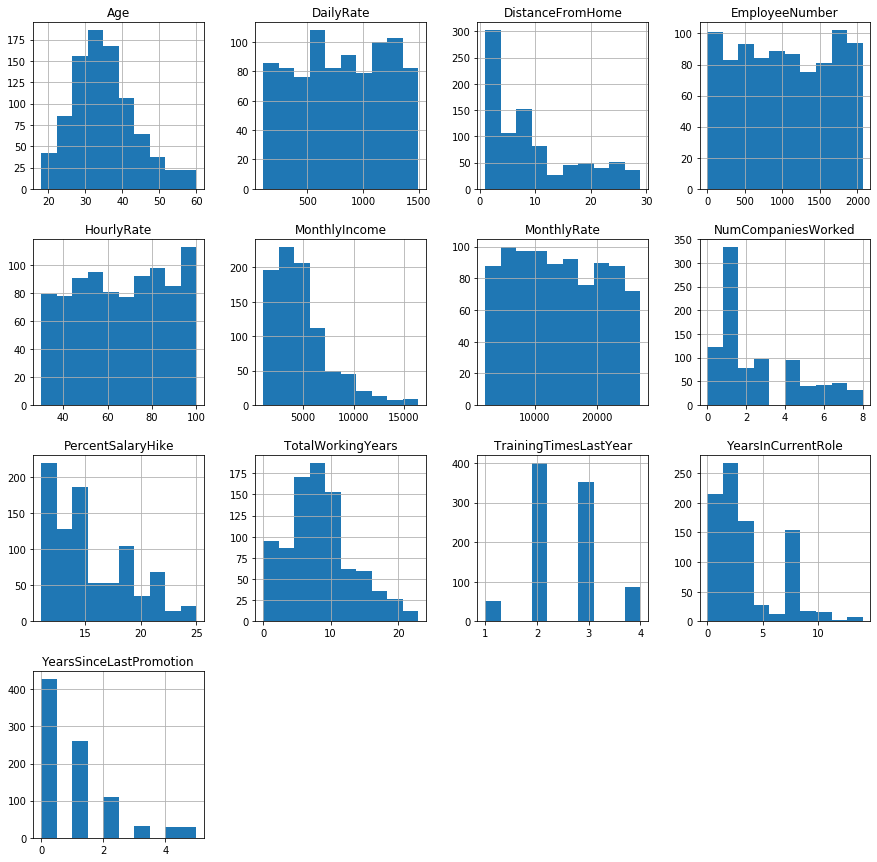

In [28]:
data.hist(figsize = (15, 15))
plt.show()

## Model Development

In [29]:
# data

In [30]:
data.reset_index(drop=True, inplace=True)
data.shape

(889, 26)

In [31]:
# Drop 'Attrition', since it is the target variable.
# Drop 'EmployeeNumber', since it does not contribute anything to the prediction of dependent variable.
X = data.drop(['Attrition', 'EmployeeNumber'], axis=1)
X = pd.get_dummies(X)
Y = data['Attrition']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(711, 54) (178, 54) (711,) (178,)


### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Logistic_reg = LogisticRegression()
Logistic_reg.fit(X_train, Y_train)
print('Training Accuracy: ', Logistic_reg.score(X_train, Y_train))
print('Testing Accuracy: ', Logistic_reg.score(X_test, Y_test))

Training Accuracy:  0.8762306610407876
Testing Accuracy:  0.8876404494382022


C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

NB_clf = MultinomialNB()
NB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', NB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', NB_clf.score(X_test, Y_test))

Training Accuracy:  0.5583684950773559
Testing Accuracy:  0.6123595505617978


In [35]:
GNB_clf = GaussianNB()
GNB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', GNB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', GNB_clf.score(X_test, Y_test))

Training Accuracy:  0.829817158931083
Testing Accuracy:  0.8595505617977528


In [36]:
BNB_clf = BernoulliNB()
BNB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', BNB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', BNB_clf.score(X_test, Y_test))

Training Accuracy:  0.8551336146272855
Testing Accuracy:  0.8764044943820225


### K-Neighbours Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

KN_clf = KNeighborsClassifier()
KN_clf.fit(X_train, Y_train)
print('Training Accuracy: ', KN_clf.score(X_train, Y_train))
print('Testing Accuracy: ', KN_clf.score(X_test, Y_test))

Training Accuracy:  0.8396624472573839
Testing Accuracy:  0.848314606741573


### SVM

In [38]:
from sklearn import svm

SVM_clf = svm.SVC()
SVM_clf.fit(X_train, Y_train)
print('Training Accuracy: ', SVM_clf.score(X_train, Y_train))
print('Testing Accuracy: ', SVM_clf.score(X_test, Y_test))

C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training Accuracy:  1.0
Testing Accuracy:  0.8426966292134831


### Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, Y_train)
print('Training Accuracy: ', DT_clf.score(X_train, Y_train))
print('Testing Accuracy: ', DT_clf.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.7415730337078652


### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, Y_train)
print('Training Accuracy: ', RF_clf.score(X_train, Y_train))
print('Testing Accuracy: ', RF_clf.score(X_test, Y_test))

Training Accuracy:  0.9901547116736991
Testing Accuracy:  0.8707865168539326


C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
ET_clf = ExtraTreesClassifier()
ET_clf.fit(X_train, Y_train)
print('Training Accuracy: ', ET_clf.score(X_train, Y_train))
print('Testing Accuracy: ', ET_clf.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.8595505617977528


C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
AB_clf = AdaBoostClassifier()
AB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', AB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', AB_clf.score(X_test, Y_test))

Training Accuracy:  0.8987341772151899
Testing Accuracy:  0.8707865168539326


In [43]:
GB_clf = GradientBoostingClassifier()
GB_clf.fit(X_train, Y_train)
print('Training Accuracy: ', GB_clf.score(X_train, Y_train))
print('Testing Accuracy: ', GB_clf.score(X_test, Y_test))

Training Accuracy:  0.9704641350210971
Testing Accuracy:  0.8932584269662921


Therefore Classification algorithms are showing decent and acceptable accuracy.